In [47]:
!pip3 install -U ucimlrepo

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [48]:
from ucimlrepo import fetch_ucirepo

In [59]:
# Loading the Car Evaluation dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_data = pd.read_csv(url, names=column_names)

# Extracting the target variable
X = car_data.drop('class', axis=1)
y = car_data['class']

# Displaying the first few rows of the dataset



In [60]:
print(car_data.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [52]:
label_encoder = LabelEncoder()
car_data_encoded = car_data.apply(label_encoder.fit_transform)

In [63]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

In [67]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)

In [70]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)


In [72]:
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)


In [74]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)

In [75]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']
predictions = [lr_pred, dt_pred, rf_pred, svm_pred, knn_pred]

In [76]:
for i, pred in enumerate(predictions):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    print(f"{models[i]}: Accuracy = {accuracy}, Precision = {precision}, Recall = {recall}, F1-score = {f1}")

Logistic Regression: Accuracy = 0.9277456647398844, Precision = 0.9305625741785836, Recall = 0.9277456647398844, F1-score = 0.9283216269377726
Decision Tree: Accuracy = 0.8901734104046243, Precision = 0.8927087566120119, Recall = 0.8901734104046243, F1-score = 0.8881723753611539
Random Forest: Accuracy = 0.8901734104046243, Precision = 0.8938196697262487, Recall = 0.8901734104046243, F1-score = 0.8842158935286745
SVM: Accuracy = 0.9508670520231214, Precision = 0.9569573811542991, Recall = 0.9508670520231214, F1-score = 0.9525710141268654
KNN: Accuracy = 0.791907514450867, Precision = 0.7459861856659933, Recall = 0.791907514450867, F1-score = 0.7645000876091139


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
svm_probs = svm_model.predict_proba(X_test_scaled)
svm_probs = svm_probs[:, 1]
svm_probs_reshaped = svm_probs.reshape(-1, 1)

# Binarize the labels for each class
y_test_bin = label_binarize(y_test, classes=['unacc', 'acc', 'good', 'vgood'])

svm_auc = roc_auc_score(y_test_bin, svm_probs_reshaped, multi_class='ovr')

print(f"SVM AUC: {svm_auc}")

SVM AUC: 0.04608012267586735


In [ ]:
print(np.sum(svm_probs, axis=0))



In [ ]:
print(y_test)
print(y_test.shape)


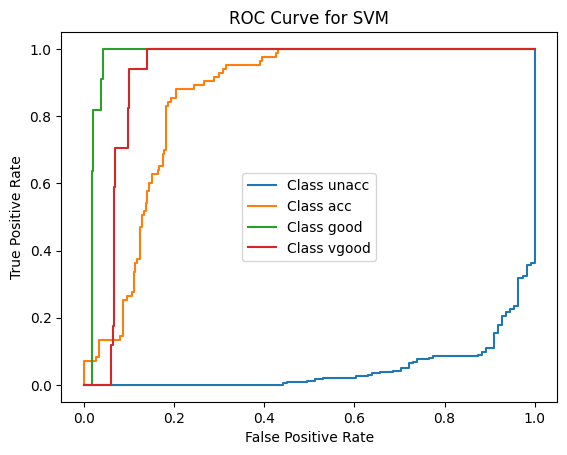

In [92]:
svm_probs_2d = svm_probs.reshape(-1, 1)

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], svm_probs_2d)

# Plot ROC curve for each class
plt.figure()
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()
plt.show()